<a href="https://colab.research.google.com/github/Giselle-Del-Sent/analise-da-receita-tributaria-brasileira/blob/main/Projeto_Receita_Tribut%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da Receita Tributária Anual no Período de 2002 a 2021**

# Objetivo

Este projeto tem como objetivo analisar a evolução da receita tributária brasileira em relação ao Produto Interno Bruto (PIB) no período de 2002 a 2021, com o apoio de visualizações gráficas que permitam identificar variações, tendências e possíveis causas associadas a eventos econômicos e conjunturais, como crises financeiras e a pandemia da Covid-19.
Além disso, busca-se examinar a composição da arrecadação por tipo de tributo e a participação relativa de cada esfera de governo — federal, estadual e municipal —, evidenciando a concentração federativa e os desdobramentos dessa estrutura no contexto fiscal do país.

---


# Sobre o conjunto de dados

O conjunto de dados foi obtido do site do Governo. Ele representa a receita tributária anual e o percentual do PIB para diferentes tributos no Brasil entre 2002 e 2021. Cada linha da tabela contém as seguintes informações:

*   Ano-calendário: Informa o ano calendário a que se refere a receita tributária arrecadada;
*   Competência: A categoria de tributos, como "Total dos Tributos União" ou "Tributos do Governo Federal";
*   Orçamento: A alocação orçamentária, por exemplo, "União" ou "Orçamento Fiscal";
*   Descrição: Uma descrição detalhada do tipo de tributo ou receita;
*   Valor da Receita Tributária: Informa o valor total da receita tributária obtida naquele ano-calendário;
*   Percentual do PIB: Informa o percentual do valor total do PIB calculado naquele ano-calendário pelo IBGE.

Esses dados permitem analisar a evolução da arrecadação tributária em relação ao crescimento econômico do país, facilitando a identificação de tendências e possíveis causas de variações, bem como permite analisar os tributos e a representatividade de cada esfera de governo sobre a receita tributária total no período. ​

---


# Processamento dos dados e análises

In [209]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Importar os dados em arquivo csv
file_path = '/content/Tabela 2 - Tributo e Competência.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
data.head()

,Ano-calendário,Competência,Orçamento,Descrição,Valor da Receita Tributária,Percentual do PIB
0,2002,Total dos Tributos União,União,Total da Receita Tributária,"477725,6437","0,320882411"
1,2002,Tributos do Governo Federal,Orçamento Fiscal,Tributos do Governo Federal,"330496,8209","0,22199063"
2,2002,Tributos do Governo Federal,Orçamento Fiscal,Orçamento Fiscal,"117337,9936","0,07881448"
3,2002,Tributos do Governo Federal,Orçamento Fiscal,Imposto de Renda - Total,"83528,69112","0,05610519"
4,2002,Tributos do Governo Federal,Orçamento Fiscal,Imposto de Renda - Pessoas Físicas,"4078,31919","0,002739357"


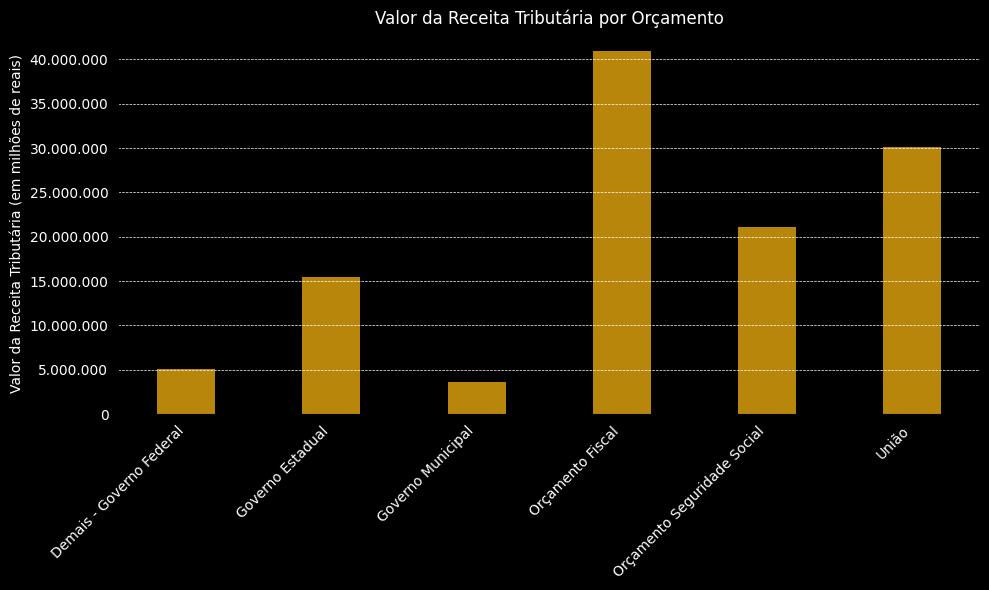

In [210]:
# Converter os valores da coluna 'Valor da Receita Tributária' para float
data['Valor da Receita Tributária'] = data['Valor da Receita Tributária'].str.replace(',', '.').astype(float)

# Agrupar por "Orçamento" e somar "Valor da Receita Tributária"
grouped_data = data.groupby('Orçamento')['Valor da Receita Tributária'].sum().reset_index()

# Função para formatar o eixo y
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Orçamento'], grouped_data['Valor da Receita Tributária'], color='#B8860B', width=0.4)

# Adicionar título e rótulos
plt.title('Valor da Receita Tributária por Orçamento', color='white')
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', color='white')

# Ajustar formatação dos eixos e cores
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Ao analisar o gráfico "Valor da Receita Tributária por Orçamento", observa-se que o Orçamento Fiscal possui a maior representatividade em comparação com os demais orçamentos. Isso indica que uma parcela significativa da receita tributária é gerada através de tributos alocados ao Orçamento Fiscal, destacando sua importância relativa dentro do contexto geral das finanças públicas.

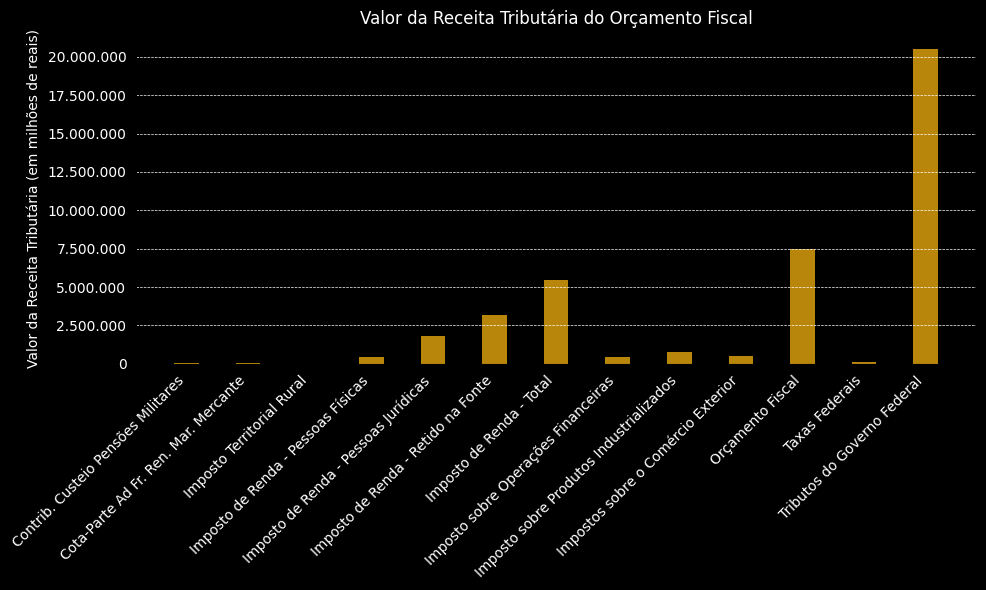

In [211]:
# Filtrar os dados para obter apenas o orçamento fiscal
grouped_fiscal_data = data[data['Orçamento'] == 'Orçamento Fiscal'].groupby('Descrição')['Valor da Receita Tributária'].sum().reset_index()

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_fiscal_data['Descrição'], grouped_fiscal_data['Valor da Receita Tributária'], color='#B8860B', width=0.4)

# Adicionar título e rótulos
plt.title('Valor da Receita Tributária do Orçamento Fiscal', color='white')
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', color='white')

# Ajustar formatação dos eixos e cores
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Considerando a predominância do Orçamento Fiscal, decidimos aprofundar a análise para identificar quais grupos de tributos se destacam em relação aos demais. Ao examinar o gráfico "Valor da Receita Tributária do Orçamento Fiscal", fica evidente que os tributos do governo federal têm a maior representatividade, superando os outros grupos. Isso sugere que a maior parte da receita tributária no Orçamento Fiscal é proveniente dos tributos administrados pelo governo federal, destacando sua importância no cenário fiscal do país.

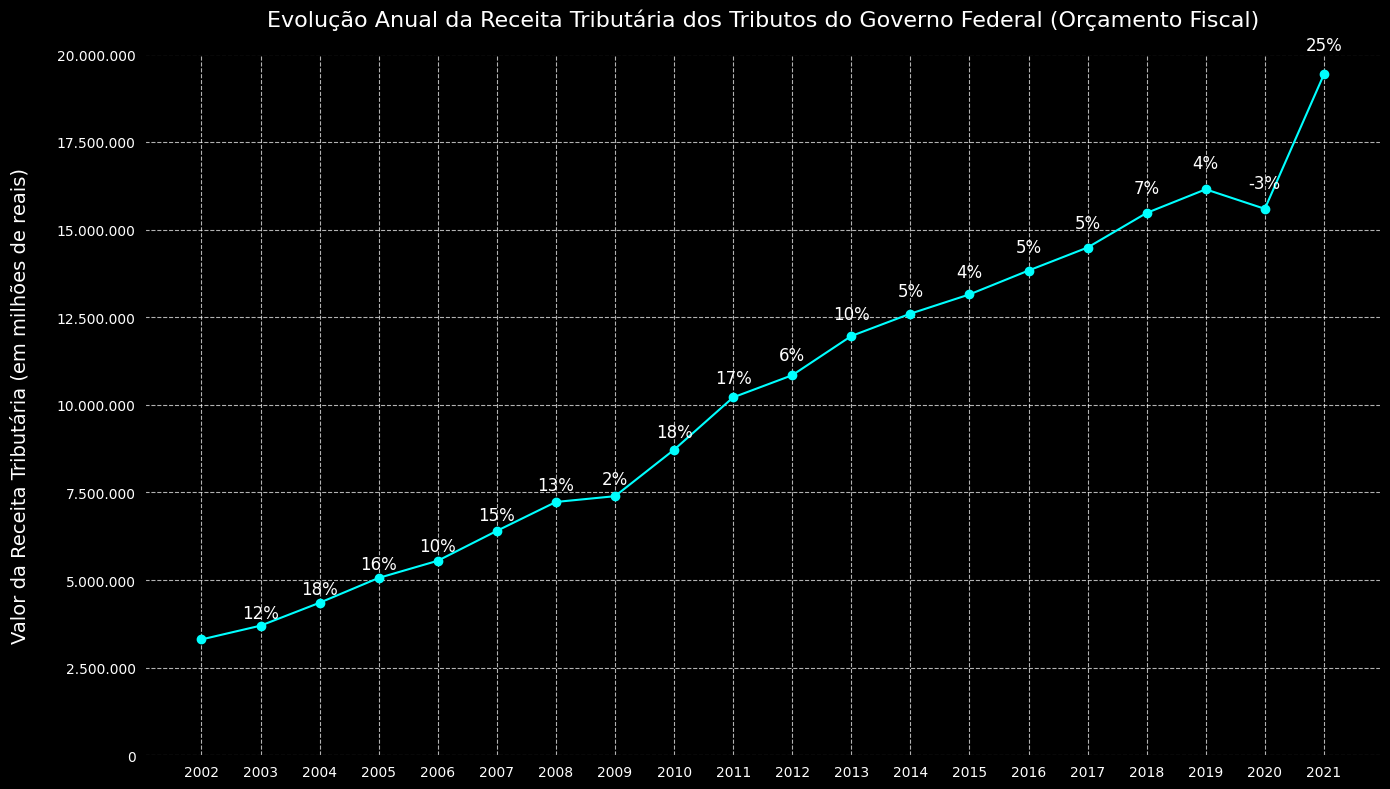

In [212]:
# Filtrar os dados para obter apenas o orçamento fiscal e tributos do governo federal
data_fiscal_federal = data[(data['Orçamento'] == 'Orçamento Fiscal') & (data['Descrição'] == 'Tributos do Governo Federal')]

# Agrupar por ano e somar os valores da receita tributária
annual_revenue = data_fiscal_federal.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Multiplicar os valores por 10 para ajustar para milhões
annual_revenue['Valor da Receita Tributária'] = annual_revenue['Valor da Receita Tributária'] * 10

# Calcular a variação percentual e absoluta ano a ano
annual_revenue['Percentual Crescimento'] = annual_revenue['Valor da Receita Tributária'].pct_change() * 100
annual_revenue['Variação Absoluta'] = annual_revenue['Valor da Receita Tributária'].diff()

# Função para formatar o eixo y
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Configurar o gráfico
plt.figure(figsize=(14, 8))
plt.plot(annual_revenue['Ano-calendário'], annual_revenue['Valor da Receita Tributária'], marker='o', color='cyan', linestyle='-')

# Adicionar título e rótulos
plt.title('Evolução Anual da Receita Tributária dos Tributos do Governo Federal (Orçamento Fiscal)', fontsize=16, color='white', pad=20)
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', fontsize=14, color='white', labelpad=20)

# Ajustar formatação dos eixos e cores
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# Definir o limite do eixo y para 20 milhões
plt.ylim(0, 20000000)

# Adicionar rótulos com o percentual de crescimento em cada ano
for i in range(1, len(annual_revenue)):
    x = annual_revenue['Ano-calendário'].iloc[i]
    y = annual_revenue['Valor da Receita Tributária'].iloc[i]
    pct_crescimento = annual_revenue['Percentual Crescimento'].iloc[i]
    plt.text(x, y + y * 0.03, f'{pct_crescimento:.0f}%', fontsize=12, ha='center', va='bottom', color='white')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Dada a significativa representatividade dos tributos do Governo Federal, arrecadados por meio do Orçamento Fiscal, o gráfico "Evolução Anual da Receita Tributária dos Tributos do Governo Federal (Orçamento Fiscal)" permite visualizar o crescimento dessas receitas ao longo dos anos. Observa-se um aumento constante na arrecadação até 2019. No entanto, em 2020, houve uma queda de 3%, provavelmente devido aos impactos econômicos causados pela pandemia de Covid-19. Em 2021, a arrecadação mostrou uma expressiva recuperação de 25%, indicando uma retomada econômica robusta e a eficácia das medidas de estímulo e recuperação implementadas pelo governo.

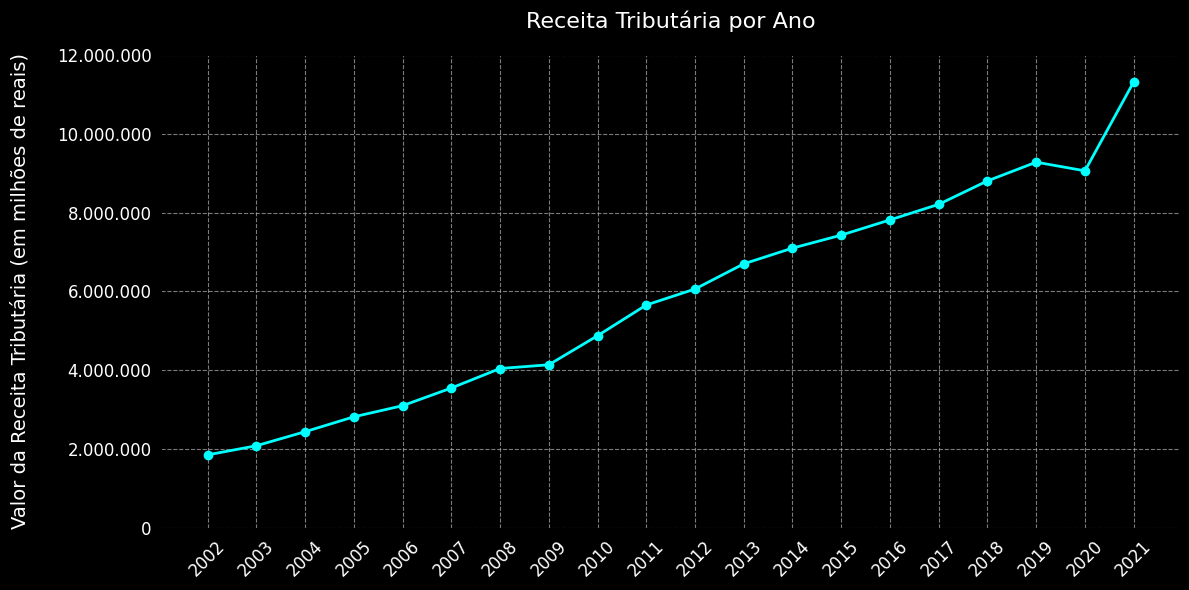

In [213]:
# Converter a coluna 'Percentual do PIB' para o formato numérico
data['Percentual do PIB'] = data['Percentual do PIB'].str.replace(',', '.').astype(float)

# Agregar os dados por ano
annual_data = data.groupby('Ano-calendário').agg({
    'Valor da Receita Tributária': 'sum',
    'Percentual do PIB': 'mean'
}).reset_index()

# Função para formatar o eixo y
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Configurar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(annual_data['Ano-calendário'], annual_data['Valor da Receita Tributária'], marker='o', color='cyan', linestyle='-', linewidth=2, markersize=6)

# Adicionar título e rótulos
plt.title('Receita Tributária por Ano', fontsize=16, color='white', pad=20)
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', fontsize=14, color='white', labelpad=20)

# Ajustar formatação dos eixos e cores
plt.xticks(annual_data['Ano-calendário'], rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

# Definir o limite do eixo y para 12 milhões
plt.ylim(0, 12000000)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Para complementar, no gráfico "Receita Tributária por Ano", é possível verificar o valor total da receita tributária arrecadada em cada ano. Ao analisar esse gráfico em paralelo com o gráfico anterior, percebe-se que a receita tributária apresentava um crescimento contínuo desde 2002. Em particular, entre 2007 e 2008, houve um aumento significativo de 13%. No entanto, entre 2008 e 2009, nota-se uma estabilidade no crescimento da receita tributária, provavelmente devido à crise financeira mundial de 2008. Durante esse período, políticas fiscais e econômicas adotadas pelo governo podem ter desempenhado um papel crucial na estabilização da economia, mitigando os efeitos adversos da crise e, por consequência, estabilizando a arrecadação tributária. Isso evidencia a resiliência das políticas econômicas implementadas e a capacidade de resposta do sistema tributário em tempos de crise.

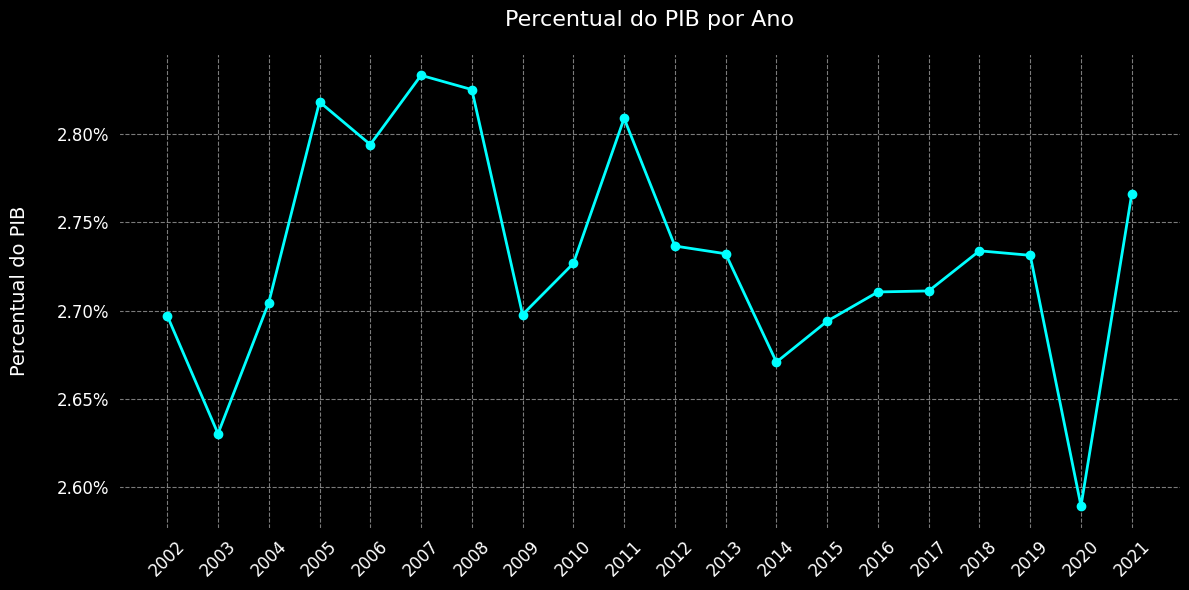

In [214]:
# Agrupar por ano e calcular a média do percentual do PIB
data_grouped = data.groupby('Ano-calendário')['Percentual do PIB'].mean().reset_index()

# Configurar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(data_grouped['Ano-calendário'], data_grouped['Percentual do PIB'], marker='o', color='cyan', linestyle='-', linewidth=2, markersize=6)

# Adicionar título e rótulos
plt.title('Percentual do PIB por Ano', fontsize=16, color='white', pad=20)
plt.ylabel('Percentual do PIB', fontsize=14, color='white', labelpad=20)

# Ajustar formatação dos eixos e cores
plt.xticks(data_grouped['Ano-calendário'], rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Em relação ao gráfico "Percentual do PIB por Ano", é possível observar as variações no percentual do PIB do país ao longo dos anos. Durante a crise financeira de 2008, há uma queda perceptível de aproximadamente 0,1 pontos percentuais. Comparativamente, durante a pandemia de Covid-19, a queda foi mais acentuada, com uma redução de cerca de 0,15 pontos percentuais. Isso indica que a pandemia teve um impacto econômico mais severo sobre o país do que a crise financeira de 2008.

A seguir, analisaremos a composição da receita tributária brasileira, detalhando os principais tributos arrecadados e avaliando a participação relativa de cada esfera de governo — federal, estadual e municipal — na geração dessas receitas.

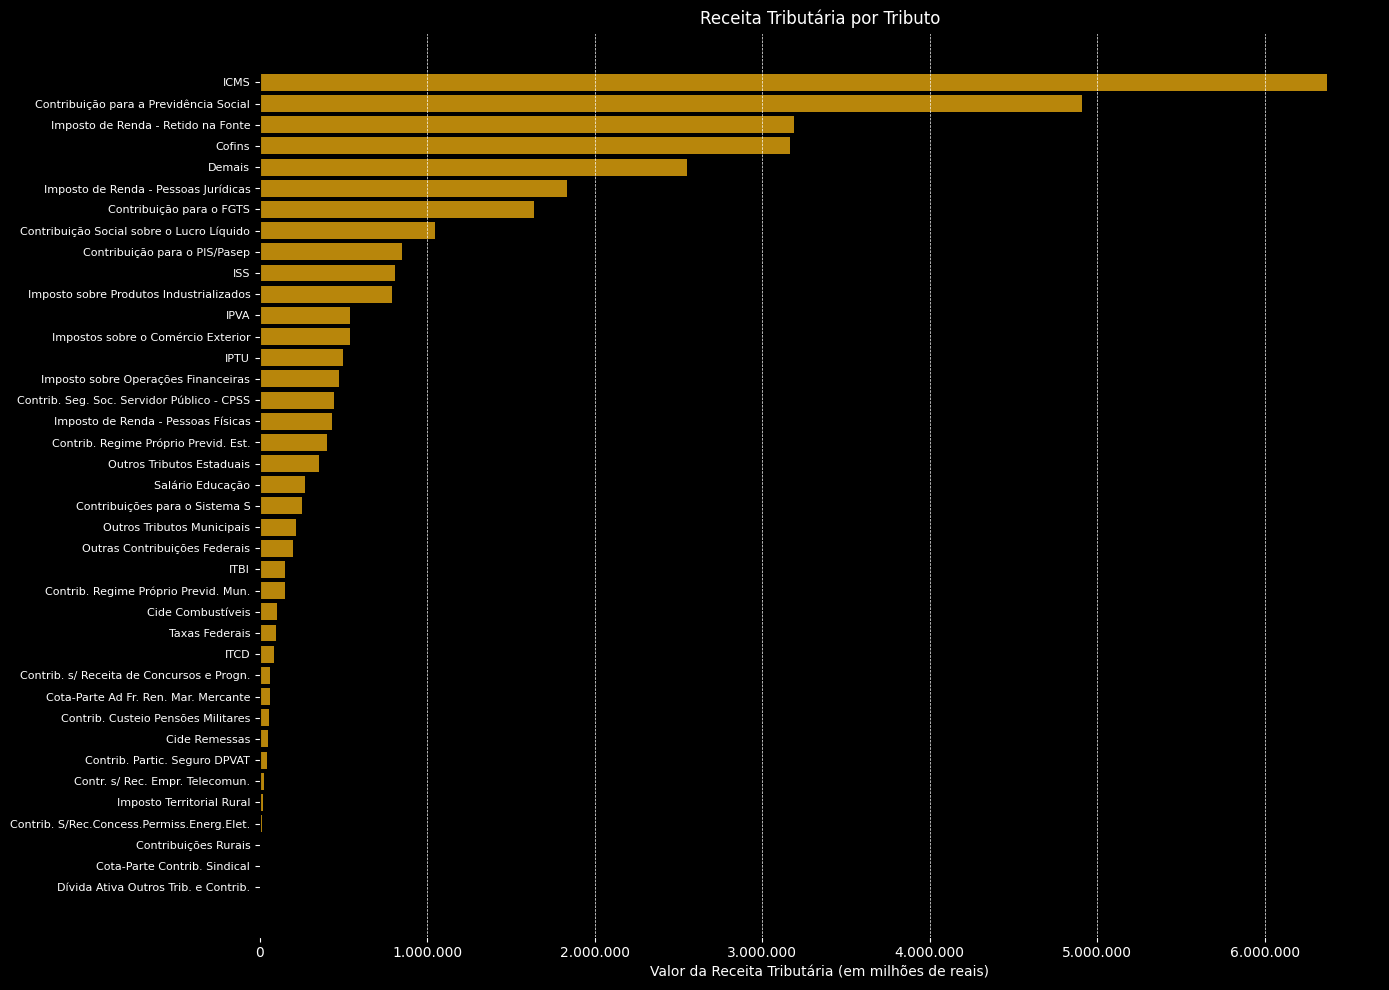

In [215]:
# Aplicar os filtros diretamente na variável "data"
data = data[data['Competência'] != 'Total dos Tributos União']
agrupadores = [
    'Total da Receita Tributária',
    'Orçamento Fiscal',
    'Orçamento Seguridade Social',
    'Tributos do Governo Federal',
    'Tributos do Governo Estadual',
    'Imposto de Renda - Total',
    'Tributos do Governo Municipal'
]
data = data[~data['Descrição'].isin(agrupadores)]

# Agrupar e ordenar
data_agrupada = data.groupby('Descrição')['Valor da Receita Tributária'].sum().reset_index()
data_agrupada = data_agrupada.sort_values(by='Valor da Receita Tributária', ascending=False)

# Função para formatar eixo y
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Gerar gráfico
plt.figure(figsize=(14, 10))
plt.barh(data_agrupada['Descrição'], data_agrupada['Valor da Receita Tributária'], color='#B8860B')
plt.title('Receita Tributária por Tributo', color='white')
plt.xlabel('Valor da Receita Tributária (em milhões de reais)', color='white')

# Ajustes de formatação
ax = plt.gca()
ax.invert_yaxis()
ax.tick_params(axis='y', labelsize=8, colors='white')  # eixo Y
ax.tick_params(axis='x', labelsize=10, colors='white')  # eixo X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='x', color='white', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

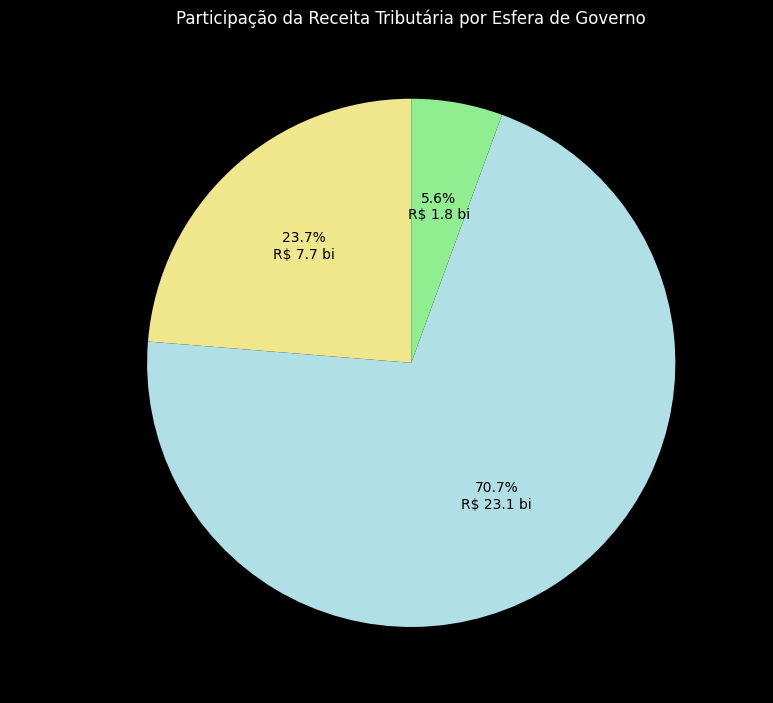

In [216]:
# Calcular receita por esfera de governo
receita_por_esfera = (
    data.groupby('Competência')['Valor da Receita Tributária']
    .sum()
    .reset_index()
)

# Função formatadora
def formatar_valor_em_bilhoes(pct, allvals):
    total = sum(allvals)
    valor = pct * total / 100
    return f'{pct:.1f}%\nR$ {valor / 1_000_000:.1f} bi'

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    receita_por_esfera['Valor da Receita Tributária'],
    labels=receita_por_esfera['Competência'],
    autopct=lambda pct: formatar_valor_em_bilhoes(pct, receita_por_esfera['Valor da Receita Tributária']),
    startangle=90,
    colors=['#F0E68C', '#B0E0E6', '#90EE90'],
    textprops={'color': 'black'}
)

plt.title('Participação da Receita Tributária por Esfera de Governo', color='white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.tight_layout()
plt.show()

Os dados analisados demonstram a composição da arrecadação tributária no Brasil, tanto sob a perspectiva do valor arrecadado por tipo de tributo quanto da sua distribuição entre as esferas de governo — federal, estadual e municipal.
O ICMS (Imposto sobre Circulação de Mercadorias e Serviços) lidera o ranking dos tributos com maior arrecadação, evidenciando sua relevância no financiamento dos governos estaduais. Na sequência, destacam-se tributos federais como:

- Contribuição para a Previdência Social
- Imposto de Renda (em suas várias formas — pessoas físicas, jurídicas e retido na fonte)
- Cofins e PIS/Pasep, que incidem sobre o faturamento das empresas
- CSLL (Contribuição Social sobre o Lucro Líquido)

Isso mostra que, embora o ICMS seja o tributo individual mais arrecadado, a esfera federal concentra diversos tributos de alta arrecadação agregada. Apesar do peso do ICMS, os dados mostram que a União centraliza a maior parte da arrecadação tributária, tanto em diversidade quanto em volume agregado de tributos. Já os municípios, embora com autonomia tributária sobre IPTU, ISS e ITBI, apresentam participação modesta no total arrecadado.

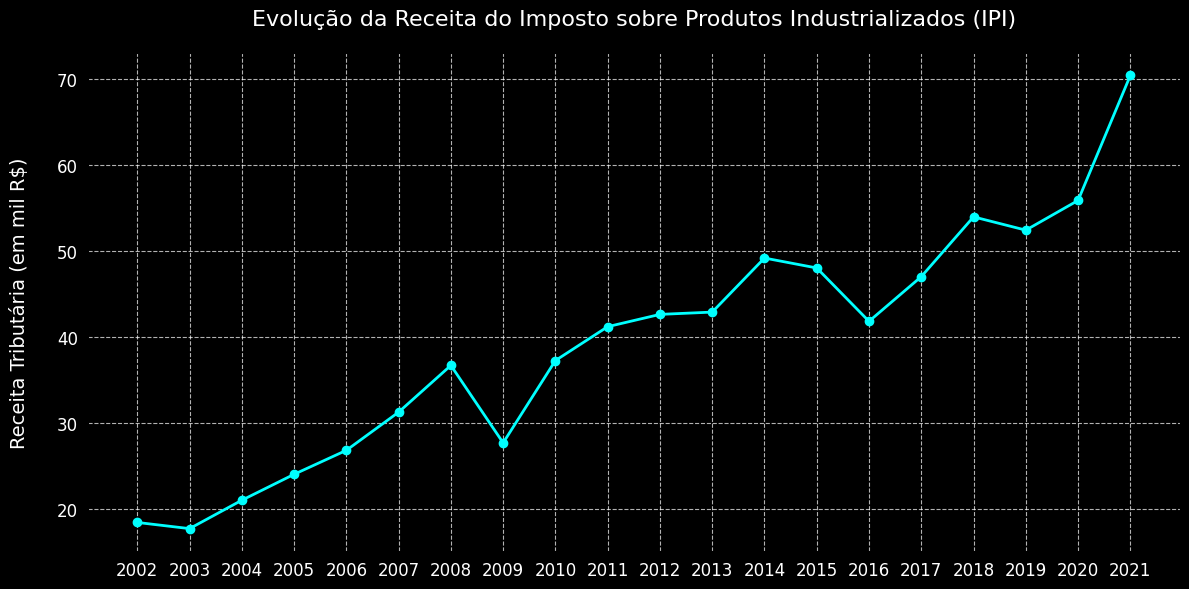

In [217]:
# Filtrar dados do Imposto sobre Produtos Industrializados (IPI)
data_ipi = data[
    (data['Descrição'] == 'Imposto sobre Produtos Industrializados')
].copy()

# Agrupar por ano e somar a receita
ipi_por_ano = data_ipi.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
ipi_por_ano['Receita (mil R$)'] = ipi_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ipi_por_ano['Ano-calendário'], ipi_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Receita do Imposto sobre Produtos Industrializados (IPI)', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(ipi_por_ano['Ano-calendário'], [str(int(ano)) for ano in ipi_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

Entre 2008 e 2009, a arrecadação do IPI caiu em função da crise financeira global, que reduziu a atividade industrial no Brasil. Para mitigar os efeitos, o governo adotou medidas de estímulo, como a redução temporária do IPI para setores como automóveis e linha branca. Em 2015 e 2016, o país enfrentou uma profunda recessão econômica, agravada por instabilidade política e queda nos investimentos, o que também reduziu significativamente a arrecadação. A produção industrial recuou fortemente, refletindo-se na base de cálculo do imposto. Em 2020, a pandemia de COVID-19 provocou mais uma queda brusca na arrecadação do IPI, com paralisação de fábricas, queda na demanda e novas desonerações para aliviar a crise. Nos anos seguintes, apesar da retomada parcial da atividade econômica, políticas de redução de alíquotas seguiram impactando a receita. A arrecadação do IPI mostra-se sensível tanto a crises econômicas quanto a decisões fiscais do governo. Isso destaca seu papel como um termômetro da indústria nacional.

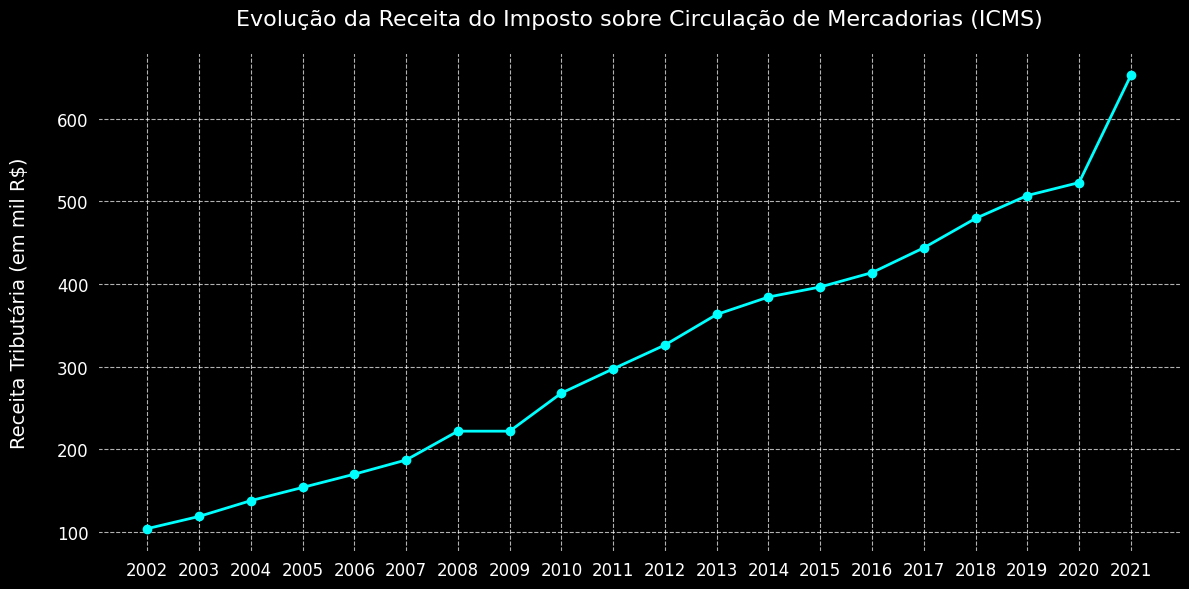

In [218]:
# Filtrar dados do Imposto sobre Circulação de Mercadorias (ICMS)
data_icms = data[
    (data['Descrição'] == 'ICMS')
].copy()

# Agrupar por ano e somar a receita
icms_por_ano = data_icms.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
icms_por_ano['Receita (mil R$)'] = icms_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(icms_por_ano['Ano-calendário'], icms_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Receita do Imposto sobre Circulação de Mercadorias (ICMS)', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(icms_por_ano['Ano-calendário'], [str(int(ano)) for ano in icms_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

Apesar da crise sanitária e econômica de 2020, a arrecadação do ICMS se manteve relativamente estável ou até cresceu em alguns estados. Isso se deve ao fato de o ICMS incidir fortemente sobre o consumo de bens essenciais e serviços, como energia elétrica, combustíveis, telecomunicações e alimentos — setores que continuaram em operação mesmo com as restrições. Além disso, o aumento do consumo online e a inflação de preços ajudaram a manter o volume de arrecadação em alta. Por fim, diferentemente do IPI, o ICMS não foi amplamente desonerado pelos estados durante a pandemia. Assim, o tributo revelou maior resiliência frente à crise, sustentado pelo perfil da base de incidência.

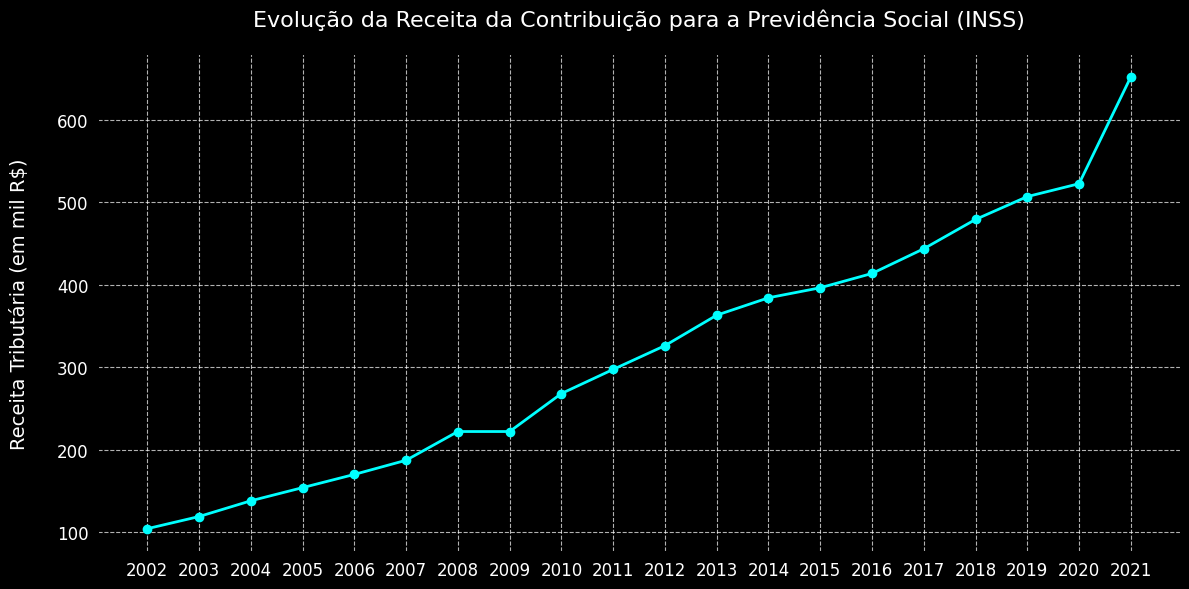

In [219]:
# Filtrar dados da Contribuição para a Previdência Social (INSS)
data_inss = data[
    (data['Descrição'] == 'Contribuição para a Previdência Social')
].copy()

# Agrupar por ano e somar a receita
inss_por_ano = data_icms.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
inss_por_ano['Receita (mil R$)'] = inss_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(inss_por_ano['Ano-calendário'], inss_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Receita da Contribuição para a Previdência Social (INSS)', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(inss_por_ano['Ano-calendário'], [str(int(ano)) for ano in inss_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

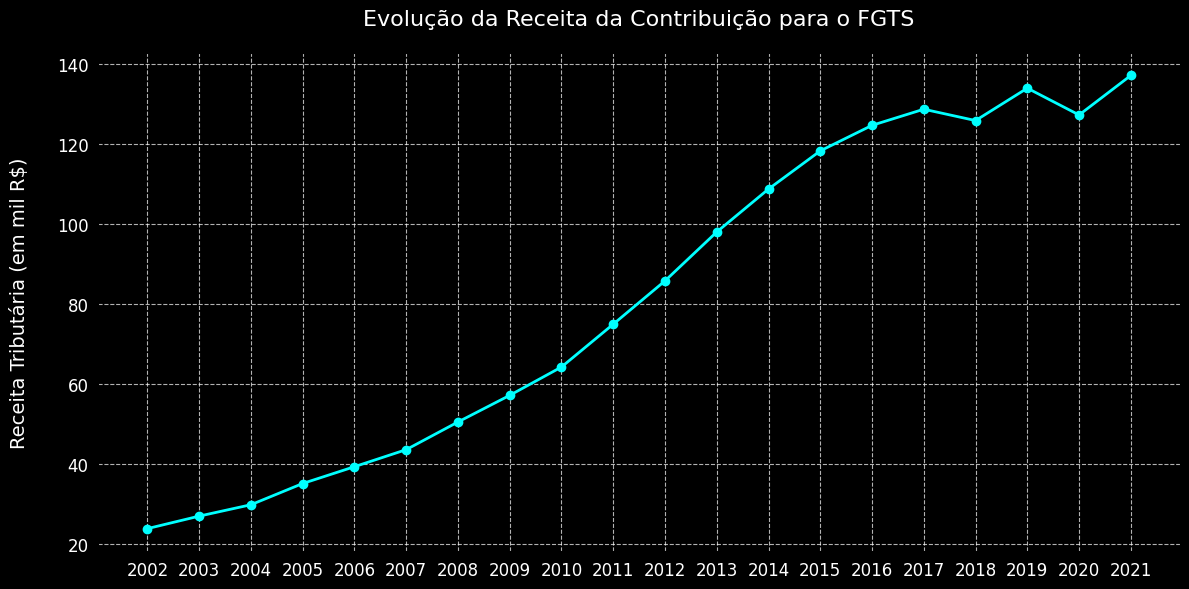

In [220]:
# Filtrar dados da Contribuição para o FGTS
data_fgts = data[
    (data['Descrição'] == 'Contribuição para o FGTS')
].copy()

# Agrupar por ano e somar a receita
fgts_por_ano = data_fgts.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
fgts_por_ano['Receita (mil R$)'] = fgts_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(fgts_por_ano['Ano-calendário'], fgts_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Receita da Contribuição para o FGTS', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(inss_por_ano['Ano-calendário'], [str(int(ano)) for ano in fgts_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

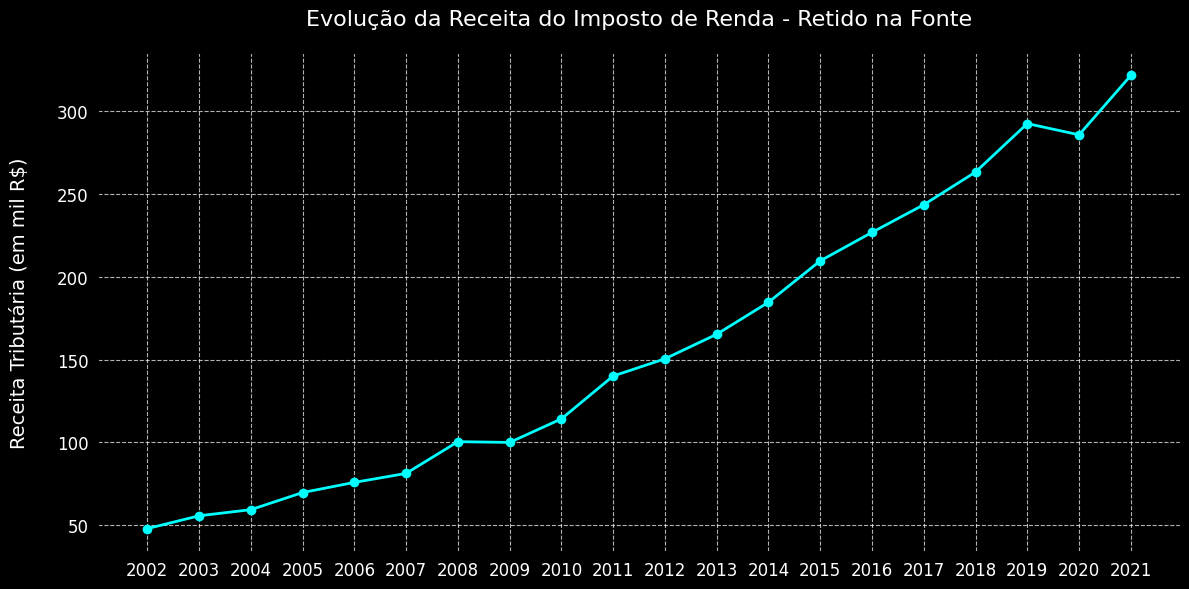

In [221]:
# Filtrar dados do Imposto de Renda - Retido na Fonte
data_irfonte = data[
    (data['Descrição'] == 'Imposto de Renda - Retido na Fonte')
].copy()

# Agrupar por ano e somar a receita
irfonte_por_ano = data_irfonte.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
irfonte_por_ano['Receita (mil R$)'] = irfonte_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(irfonte_por_ano['Ano-calendário'], irfonte_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Receita do Imposto de Renda - Retido na Fonte', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(irfonte_por_ano['Ano-calendário'], [str(int(ano)) for ano in irfonte_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

A análise da tendência da arrecadação da Contribuição para a Previdência Social (INSS), do Fundo de Garantia do Tempo de Serviço (FGTS) e do Imposto de Renda Retido na Fonte (IRRF) ao longo dos anos revela como esses tributos estão intimamente ligados ao desempenho do mercado de trabalho e à atividade econômica no Brasil.

A Contribuição para a Previdência Social, que corresponde à arrecadação do INSS, apresentou uma trajetória de crescimento consistente ao longo dos anos, com duas quedas significativas: em 2009 e em 2020. A primeira está associada à crise financeira global de 2008, que causou uma desaceleração econômica no Brasil e aumento do desemprego. Já a queda em 2020 foi provocada pela pandemia de COVID-19, que resultou na paralisação de atividades econômicas, suspensão de contratos de trabalho e redução de salários. A recuperação da arrecadação nos anos seguintes demonstra a retomada gradual do emprego e da massa salarial.

O FGTS, que também é diretamente ligado ao vínculo empregatício formal, seguiu um padrão semelhante ao do INSS, embora com valores absolutos menores. As mesmas quedas observadas em 2009 e 2020 refletem o impacto de crises econômicas sobre o mercado de trabalho. A arrecadação do FGTS depende do número de trabalhadores com carteira assinada, o que o torna sensível a oscilações na geração de empregos.

O Imposto de Renda Retido na Fonte (IRRF), por sua vez, apresentou uma evolução mais estável ao longo do tempo. Embora também tenha registrado leves quedas em 2009 e 2020, seus valores não foram tão impactados quanto os do INSS e do FGTS. Isso se deve ao fato de o IRRF incidir sobre uma base de rendimentos mais diversificada, que inclui salários, aluguéis, serviços e aplicações financeiras. A estabilidade e o crescimento desse tributo indicam que mesmo em momentos de crise, parte significativa da arrecadação é mantida por outras fontes de renda além do trabalho formal.

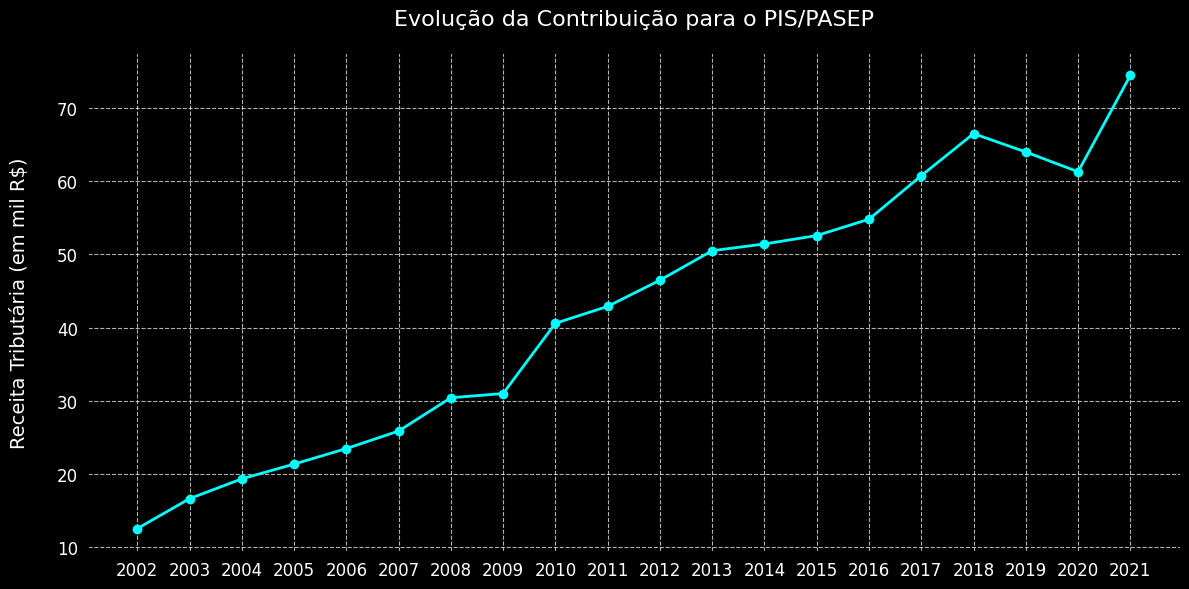

In [222]:
# Filtrar dados da Contribuição para o PIS/PASEP
data_pis = data[
    (data['Descrição'] == 'Contribuição para o PIS/Pasep')
].copy()

# Agrupar por ano e somar a receita
pis_por_ano = data_pis.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
pis_por_ano['Receita (mil R$)'] = pis_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(pis_por_ano['Ano-calendário'], pis_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Contribuição para o PIS/PASEP', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(pis_por_ano['Ano-calendário'], [str(int(ano)) for ano in pis_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

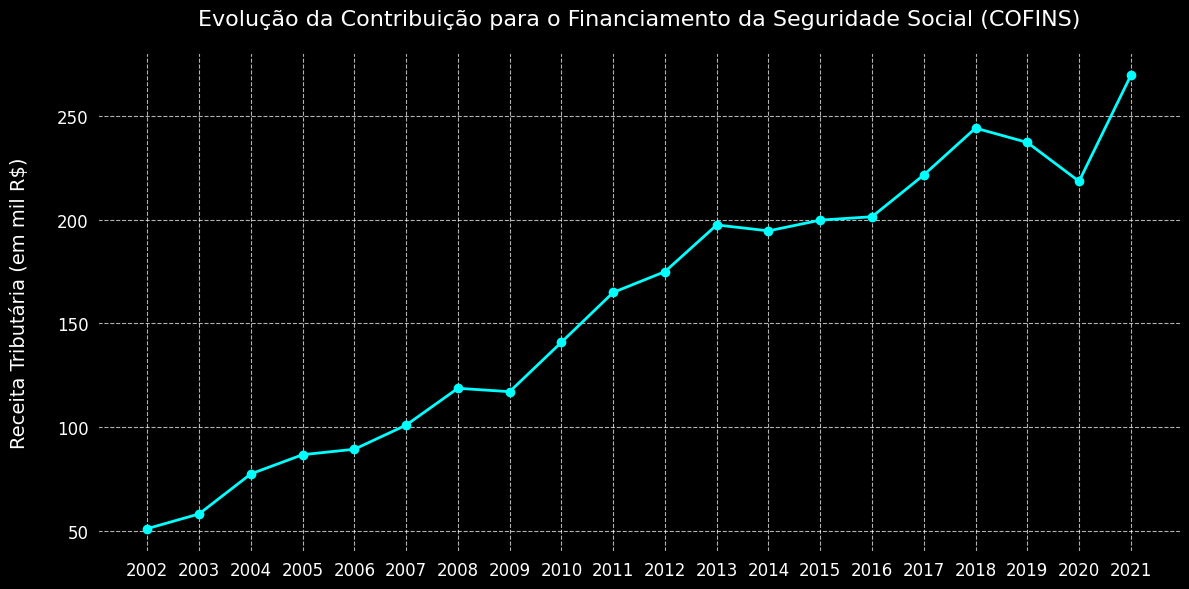

In [223]:
# Filtrar dados da Contribuição para o Financiamento da Seguridade Social (COFINS)
data_cofins = data[
    (data['Descrição'] == 'Cofins')
].copy()

# Agrupar por ano e somar a receita
cofins_por_ano = data_cofins.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
cofins_por_ano['Receita (mil R$)'] = cofins_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(cofins_por_ano['Ano-calendário'], cofins_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Contribuição para o Financiamento da Seguridade Social (COFINS)', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(cofins_por_ano['Ano-calendário'], [str(int(ano)) for ano in cofins_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

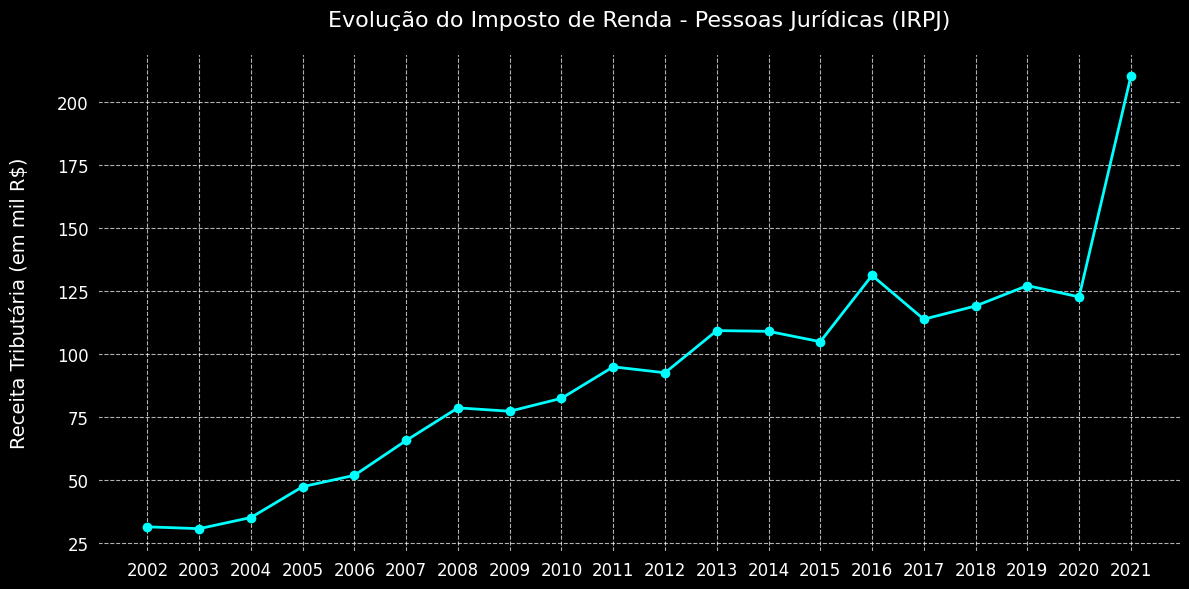

In [224]:
# Filtrar dados do Imposto de Renda - Pessoas Jurídicas (IRPJ)
data_irpj = data[
    (data['Descrição'] == 'Imposto de Renda - Pessoas Jurídicas')
].copy()

# Agrupar por ano e somar a receita
irpj_por_ano = data_irpj.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
irpj_por_ano['Receita (mil R$)'] = irpj_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(irpj_por_ano['Ano-calendário'], irpj_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução do Imposto de Renda - Pessoas Jurídicas (IRPJ)', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(irpj_por_ano['Ano-calendário'], [str(int(ano)) for ano in irpj_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

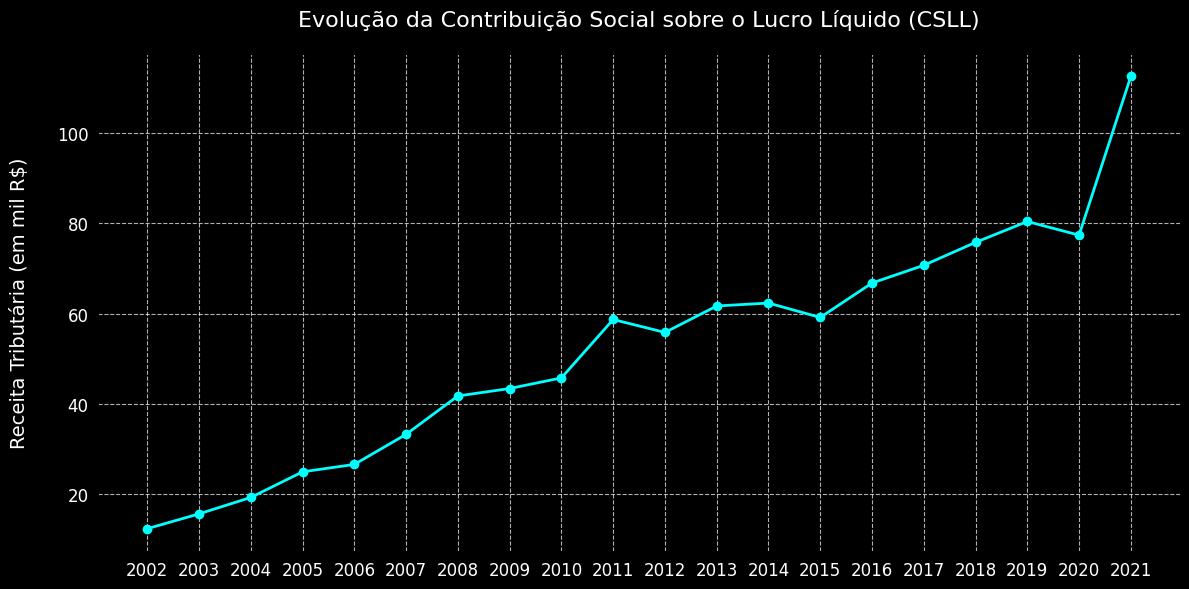

In [225]:
# Filtrar dados da Contribuição Social sobre o Lucro Líquido (CSLL)
data_csll = data[
    (data['Descrição'] == 'Contribuição Social sobre o Lucro Líquido')
].copy()

# Agrupar por ano e somar a receita
csll_por_ano = data_csll.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
csll_por_ano['Receita (mil R$)'] = csll_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(csll_por_ano['Ano-calendário'], csll_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução da Contribuição Social sobre o Lucro Líquido (CSLL)', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(csll_por_ano['Ano-calendário'], [str(int(ano)) for ano in csll_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

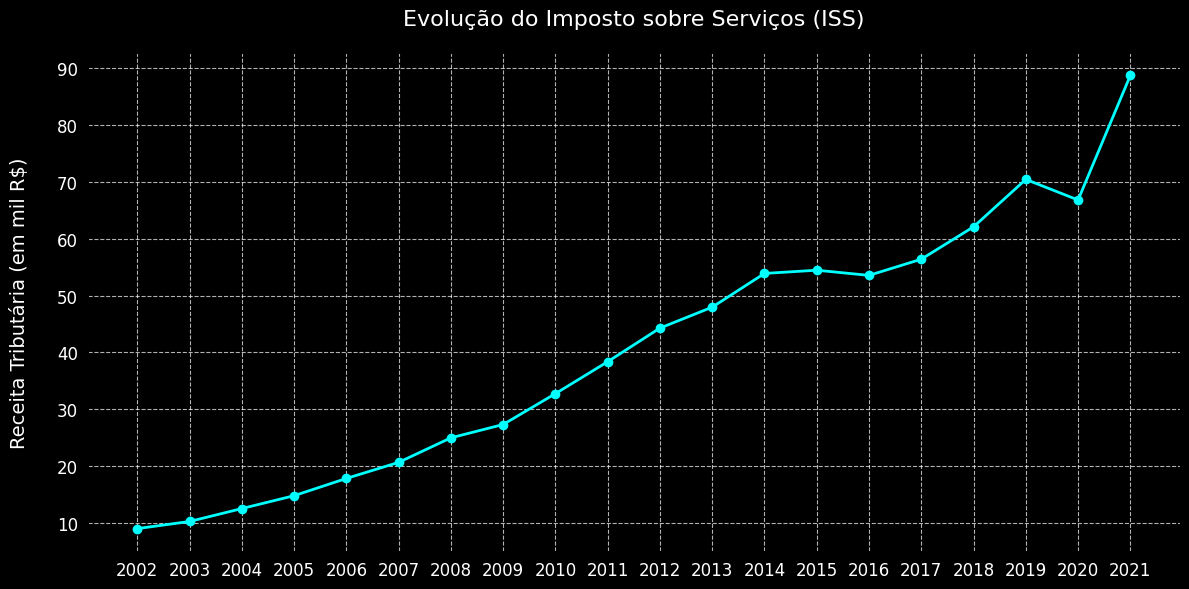

In [226]:
# Filtrar dados do Imposto sobre Serviços (ISS)
data_iss = data[
    (data['Descrição'] == 'ISS')
].copy()

# Agrupar por ano e somar a receita
iss_por_ano = data_iss.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
iss_por_ano['Receita (mil R$)'] = iss_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(iss_por_ano['Ano-calendário'], iss_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução do Imposto sobre Serviços (ISS)', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(iss_por_ano['Ano-calendário'], [str(int(ano)) for ano in iss_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

A análise da arrecadação dos tributos PIS, COFINS, IRPJ, CSLL e ISS entre 2002 e 2021 evidencia padrões distintos, refletindo as características de cada tributo e os ciclos econômicos do país. As contribuições PIS e COFINS, ligadas ao faturamento das empresas, apresentaram crescimento constante até 2014, impulsionadas pela expansão econômica. A partir de 2015, sofreram queda com a recessão, seguida de recuperação gradual nos anos seguintes. Em 2020, o impacto da pandemia causou nova retração, mas em 2021 os valores voltaram a crescer, acompanhando a retomada econômica.

O IRPJ e a CSLL, que incidem sobre o lucro das empresas, mostraram maior sensibilidade às oscilações do cenário econômico. Ambas as receitas cresceram até 2013, mas caíram acentuadamente entre 2014 e 2016 com a crise econômica e a queda nos lucros corporativos. A recuperação teve início em 2017 e se intensificou em 2021, com forte alta nas arrecadações, o que pode indicar não apenas a melhora do desempenho das empresas, mas também possíveis mudanças em alíquotas e regras de tributação.

Por fim, o ISS, de competência municipal e incidente sobre serviços, teve um comportamento mais linear, refletindo a relativa estabilidade do setor até 2019. No entanto, em 2020, esse tributo foi um dos mais impactados pelas medidas de isolamento social que atingiram diretamente os serviços presenciais. A recuperação em 2021 foi mais gradual em comparação aos tributos federais. No geral, os dados revelam que as variações nas receitas tributárias estão fortemente associadas a eventos econômicos como recessões, crises políticas e a pandemia, evidenciando o quanto o sistema tributário é influenciado pelo desempenho macroeconômico.

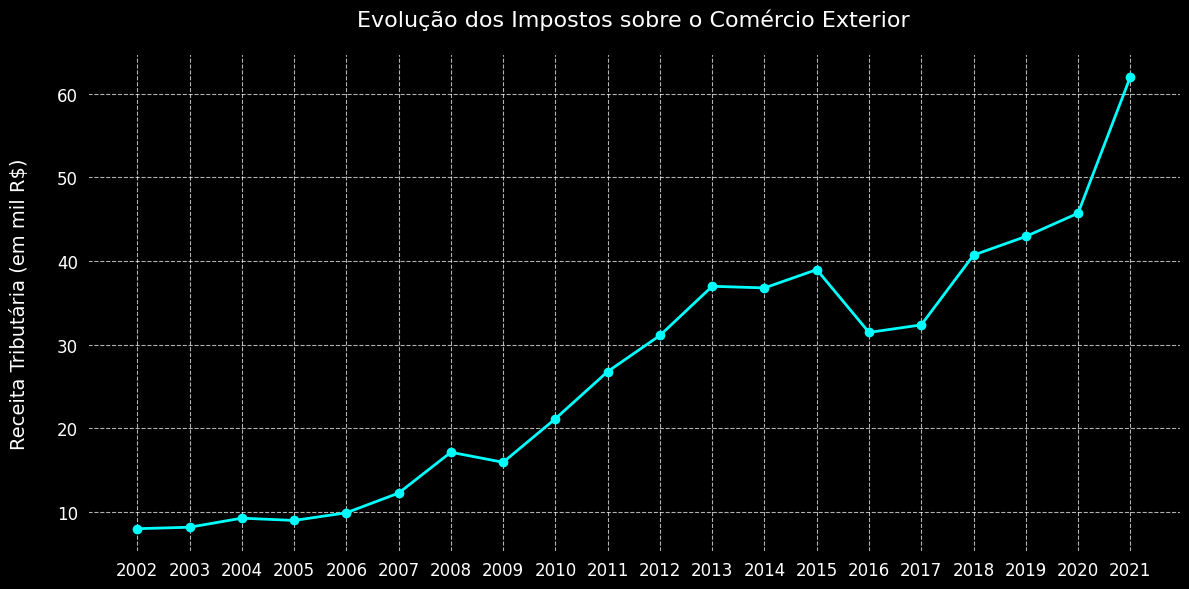

In [227]:
# Filtrar dados dos Impostos sobre o Comércio Exterior
data_comex = data[
    (data['Descrição'] == 'Impostos sobre o Comércio Exterior')
].copy()

# Agrupar por ano e somar a receita
comex_por_ano = data_comex.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
comex_por_ano['Receita (mil R$)'] = comex_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comex_por_ano['Ano-calendário'], comex_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução dos Impostos sobre o Comércio Exterior', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(comex_por_ano['Ano-calendário'], [str(int(ano)) for ano in comex_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

A evolução da arrecadação dos Impostos sobre o Comércio Exterior no Brasil entre 2002 e 2021 revela oscilações marcadas por conjunturas econômicas globais e internas. Entre 2002 e 2008, a receita cresceu de forma consistente, impulsionada pela forte expansão do comércio internacional, crescimento da economia chinesa (principal parceira comercial do Brasil) e valorização das commodities. Esse período foi marcado por aumento nas importações, o que naturalmente elevou a arrecadação com impostos incidentes sobre bens estrangeiros.

Em 2009, observa-se uma queda significativa na arrecadação, reflexo direto da crise financeira global iniciada em 2008, que derrubou o volume de comércio mundial e afetou severamente as exportações e importações brasileiras. A partir de 2010, com a recuperação da economia global, as receitas voltaram a crescer, embora de forma mais moderada. Contudo, entre 2015 e 2016, nova retração foi registrada, associada à recessão interna brasileira, desvalorização cambial e queda da atividade econômica, o que reduziu a demanda por bens importados.

Nos anos seguintes, a arrecadação se manteve relativamente estável, até que em 2020 houve nova queda em decorrência da pandemia da Covid-19. As restrições à circulação de mercadorias, fechamento de fronteiras e a contração da demanda global impactaram diretamente as operações de comércio exterior. Já em 2021, nota-se um aumento expressivo na receita, resultado da retomada econômica, reabertura das cadeias logísticas globais e da alta do dólar frente ao real, que ampliou a base de cálculo dos tributos sobre importação, mesmo com volumes ainda em recuperação.

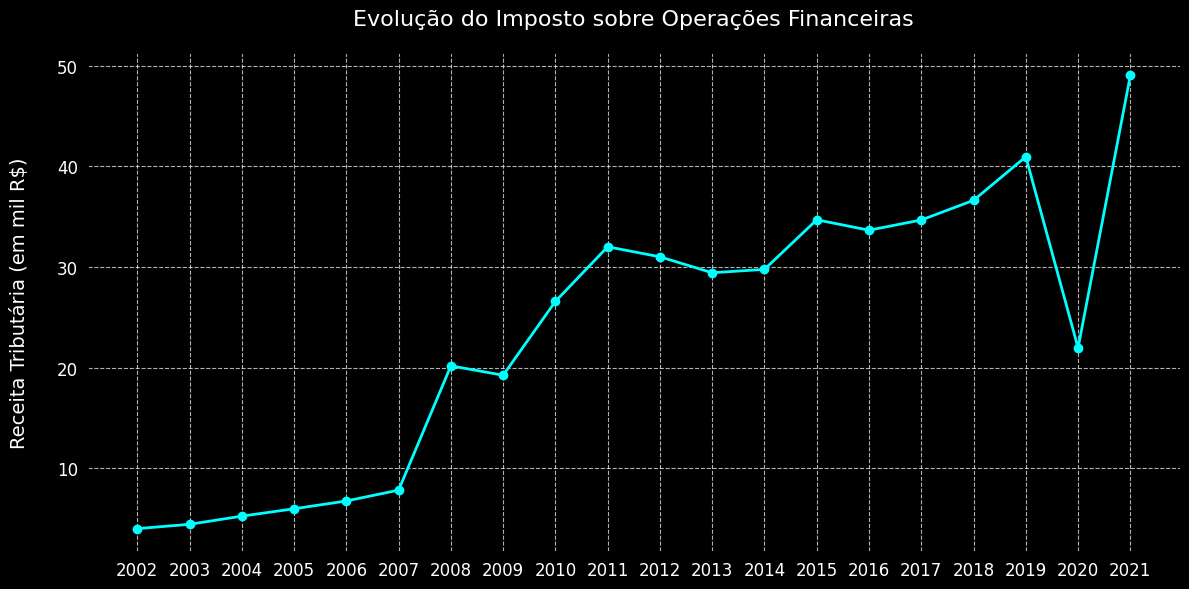

In [228]:
# Filtrar dados do Imposto sobre Operações Financeiras
data_iof = data[
    (data['Descrição'] == 'Imposto sobre Operações Financeiras')
].copy()

# Agrupar por ano e somar a receita
iof_por_ano = data_iof.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Converter valores para milhares de reais
iof_por_ano['Receita (mil R$)'] = iof_por_ano['Valor da Receita Tributária'] / 1_000

# Função para formatar o eixo Y com ponto como separador de milhar
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Plotar gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(iof_por_ano['Ano-calendário'], iof_por_ano['Receita (mil R$)'], marker='o', color='cyan', linewidth=2)

# Título e rótulos
plt.title('Evolução do Imposto sobre Operações Financeiras', fontsize=16, color='white', pad=20)
plt.ylabel('Receita Tributária (em mil R$)', fontsize=14, color='white', labelpad=20)

# Eixo X como inteiro e visualmente limpo
plt.xticks(iof_por_ano['Ano-calendário'], [str(int(ano)) for ano in iof_por_ano['Ano-calendário']], fontsize=12, color='white')

# Eixo Y formatado
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

# Estilo visual
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Exibir gráfico
plt.tight_layout()
plt.show()

O gráfico do IOF (Imposto sobre Operações Financeiras) mostra uma trajetória de arrecadação marcada por oscilações significativas entre 2002 e 2021, refletindo não apenas o desempenho da economia, mas também alterações frequentes na legislação e nas alíquotas aplicadas sobre crédito, câmbio, seguros e operações com títulos.

Entre 2002 e 2008, a arrecadação com IOF apresentou crescimento moderado, impulsionada pela expansão do crédito e pelo aumento das transações financeiras no contexto de crescimento econômico. Em 2008, destaca-se um salto na arrecadação, consequência de alterações normativas que ampliaram a base de incidência do imposto após a extinção da CPMF. Nos anos seguintes, a receita oscilou com as intervenções do governo no mercado de crédito, especialmente entre 2011 e 2013, quando o IOF foi utilizado como instrumento de política econômica para conter o consumo e limitar a entrada de capital estrangeiro especulativo.

Durante a pandemia da Covid-19, em 2020, houve forte retração na arrecadação, explicada tanto pela redução das operações financeiras quanto pela redução temporária das alíquotas do IOF como medida de estímulo à economia. Em 2021, observa-se um aumento expressivo na receita, resultado da reativação da economia, recomposição de alíquotas e maior volume de operações de crédito, especialmente no setor empresarial. O comportamento do IOF ao longo dos anos demonstra seu papel como ferramenta de regulação econômica, com variações frequentemente atreladas a decisões governamentais e políticas monetárias

# Conclusão

A análise da arrecadação tributária brasileira evidencia diversos aspectos estruturais e conjunturais relevantes.

A maior parte da receita tributária é concentrada na União, que responde por aproximadamente 74% da arrecadação total. Essa centralização pode limitar a autonomia financeira de estados e municípios, que arrecadam cerca de 20% e 6%, respectivamente.

Apesar disso, o ICMS, tributo estadual que, como já observado anteriormente, é o imposto individual com maior arrecadação no país. Esse dado destaca o papel fundamental dos estados na estrutura arrecadatória, ainda que a soma dos tributos federais supere em volume total. A arrecadação dos municípios permanece limitada, mesmo com autonomia para tributar atividades locais por meio do ISS, IPTU e ITBI. Isso reforça a necessidade de discutir mecanismos de redistribuição de receitas e fortalecimento da base fiscal local.

A esfera federal concentra a maior diversidade de tributos relevantes, como IR, CSLL, Cofins, PIS/Pasep e contribuições sociais, o que proporciona uma base de arrecadação ampla e menos dependente de um único tributo.

O impacto da pandemia da Covid-19 foi expressivo, afetando todos os níveis de governo, com queda na atividade econômica, retração do consumo e redução da arrecadação. Estados e municípios, com menor autonomia financeira e maior dependência de repasses, foram especialmente prejudicados. Esse cenário reforça a urgência de se discutir reformas estruturais que promovam maior equilíbrio federativo, simplificação tributária, justiça fiscal e maior resiliência frente a crises. O projeto também aponta para a importância de continuar a análise com dados mais recentes, caso venham a ser publicados, ampliando a compreensão sobre os efeitos do pós-pandemia, das reformas econômicas em curso e das novas dinâmicas de arrecadação em um Brasil em transformação.

---



# Possibilidades de Expansão da Análise

A partir dos resultados obtidos neste estudo, identificam-se diferentes caminhos que podem ser explorados para aprofundar a compreensão sobre a estrutura tributária brasileira:

1. Análise temporal com dados atualizados: Caso sejam publicados os dados referentes aos anos posteriores a 2021, será possível dar continuidade ao projeto, atualizando as análises de tendência e incorporando os efeitos de eventos recentes, como o período pós-pandemia, mudanças políticas e reformas econômicas.

2. Correção dos valores pela inflação:
Ajustar os valores da receita tributária com base em índices de preços permitiria comparar os dados em termos reais, favorecendo uma avaliação mais precisa da variação do poder arrecadatório ao longo do tempo.

3. Desagregação regional da arrecadação:
Caso haja dados disponíveis por unidade federativa, seria possível analisar a receita por estado ou município, o que ajudaria a compreender desigualdades regionais na arrecadação e na dependência de repasses federais.

4. Comparação com indicadores socioeconômicos:
Relacionar a receita tributária com dados como PIB per capita, IDH ou população poderia trazer novos insights sobre equidade tributária, capacidade contributiva e eficiência arrecadatória entre regiões.